In [14]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [15]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

In [16]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [17]:
import seaborn as sns
sns.set(style="darkgrid")

In [18]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [21]:
input1 = pd.read_csv('../../data/Ch3_with_features.csv')
input2 = pd.read_csv('../../data/ch3_with_features_2.csv')
input_ch3 = pd.concat([input1,input2])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
input_ch3.drop('Unnamed: 0', axis=1, inplace=True)
input_ch3.drop('Unnamed: 0.1', axis=1,inplace=True)
input_ch3.drop('Unnamed: 0.1.1', axis=1, inplace=True)

In [23]:
input_ch3.head()

,DOW,category,date,headline,hour,is_การเมือง,is_กีฬา,is_ต่างประเทศ,is_บันเทิง,is_สังคมออนไลน์,is_อาชญากรรม,is_เศรษฐกิจ,is_โครงข่ายตาสับปะรด,is_ในประเทศ,is_ในพระราชสำนัก,is_ไลฟ์สไตล์,month,nadverb_per_ntoken,nnoun_per_ntoken,numChar,numTag,numToken,num_adverb,num_classifier,num_conjunction,num_date,num_determiner,num_email,num_ending,num_interjunction,num_law,num_len,num_location,num_money,num_neg,num_negator,num_noun,num_organization,num_percent,num_person,num_person_2,num_phone,num_pos,num_prefix,num_preposition,num_preverb,num_pronoun,num_punctuation,num_tag_pop,num_tag_worst,num_time,num_url,num_verb,nverb_per_ntoken,sim_top,sim_worst,tag,tag_pop_mean,tag_pop_sum,tag_top_pop_mean,tag_top_pop_sum,tag_top_worst_mean,tag_top_worst_sum,time,timeDelta,token,view,year
0,FRI,ในประเทศ,2019-04-05,"เจ้าหน้าที่ยังตามหา""น้องภาคิน""หายตัวจากบ้าน",19.0,0,0,0,0,0,0.0,0,0,1,0,0,4,0.0,0.666667,32,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0.333333,0.639522,0.655310,"น้องภาคิน,เด็กหาย,เพชรบุรี",28,85,1,1,0,0,19:01,15,"เจ้าหน้าที่,หา,น้องภาคิน,หาย,ตัว,บ้าน",143,2019
1,FRI,กีฬา,2019-04-05,"""รัชนก""พ่าย""ไท่ ซื่อ หยิง""มือ 1 โลก ร่วงตกรอบ 8 คน แบดมาเลเซีย โอเพ่น",18.0,0,1,0,0,0,0.0,0,0,0,0,0,4,0.0,0.916667,54,4,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.000000,0.687734,0.669493,"ไท่ ซื่อ หยิง,มาเลเซีย โอเพ่น,แบดมินตัน,รัชนก อินทนนท์",26,104,1,1,3,3,18:50,15,"รัชนก,พ่าย,ไท่,ซื่อ,หยิง,มือ,โลก,ร่วง,ตกรอบ,คน,แบดมาเลเซีย,โอเพ่น",108,2019
2,FRI,กีฬา,2019-04-05,“สราวุฒิ” สุดเจ๋งผงาดคว้าแชมป์สเตจ 5 จักรยานทางไกล ทัวร์ ออฟ ไทยแลนด์,18.0,0,1,0,0,0,0.0,0,0,0,0,0,4,0.0,1.111111,52,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.630430,0.685085,"ทัวร์ ออฟ ไทยแลนด์,สราวุฒิ สิริรณชัย,จักรยานทางไกล",2,7,0,0,0,0,18:38,15,"สราวุฒิ,เจ๋ง,ผงาด,คว้า,แชมป์,สเตจ,จักรยาน,ทัวร์,ออฟ ไทยแลนด์",205,2019
3,FRI,บันเทิง,2019-04-05,"""แบงค์ ฮอร์โมน""ขอผ่อนผันการเกณฑ์ทหาร",18.0,0,0,0,1,0,0.0,0,0,0,0,0,4,0.0,1.250000,29,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.605985,0.516583,"แบงค์ ฮอร์โมน,ผ่อนผันทหาร",1,2,0,0,0,0,18:25,15,"แบงค์ ฮอร์โมน,ผ่อนผัน,เกณฑ์,ทหาร",73,2019
4,FRI,กีฬา,2019-04-05,สนามฟุตบอลจากขยะรีไซเคิล ช่วงบอลโลก 2018,18.0,0,1,0,0,0,0.0,0,0,0,0,0,4,0.0,1.000000,31,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0.000000,0.609096,1.000000,"ฟุตบอลโลก 2018,สนามฟุตบอล,สนามฟุตบอลจากวัสดุรีไซเคิล,ขยะรีไซเคิล",7,29,0,0,1,6,18:06,15,"สนาม,ฟุตบอล,ขยะ,รีไซเคิล,บอล,โลก,2018",18,2019


In [24]:
input_ch3['view'].describe()

count    45269.000000 
mean     825.004462   
std      3441.722419  
min      5.000000     
25%      176.000000   
50%      309.000000   
75%      596.000000   
max      233230.000000
Name: view, dtype: float64

In [25]:
MAXVIEW = input_ch3['view'].max()
MAXVIEW

233230

In [26]:
view_mean = input_ch3['view'].describe()['mean']
view_sd = input_ch3['view'].describe()['std']

In [27]:
input_ch3['view'].describe()

count    45269.000000 
mean     825.004462   
std      3441.722419  
min      5.000000     
25%      176.000000   
50%      309.000000   
75%      596.000000   
max      233230.000000
Name: view, dtype: float64

In [28]:
len(input_ch3)

45269

## Feature extraction

In [29]:
input_ch3_train, input_ch3_test = train_test_split(input_ch3, test_size=0.2,random_state=100)

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['TH SarabunPSK'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


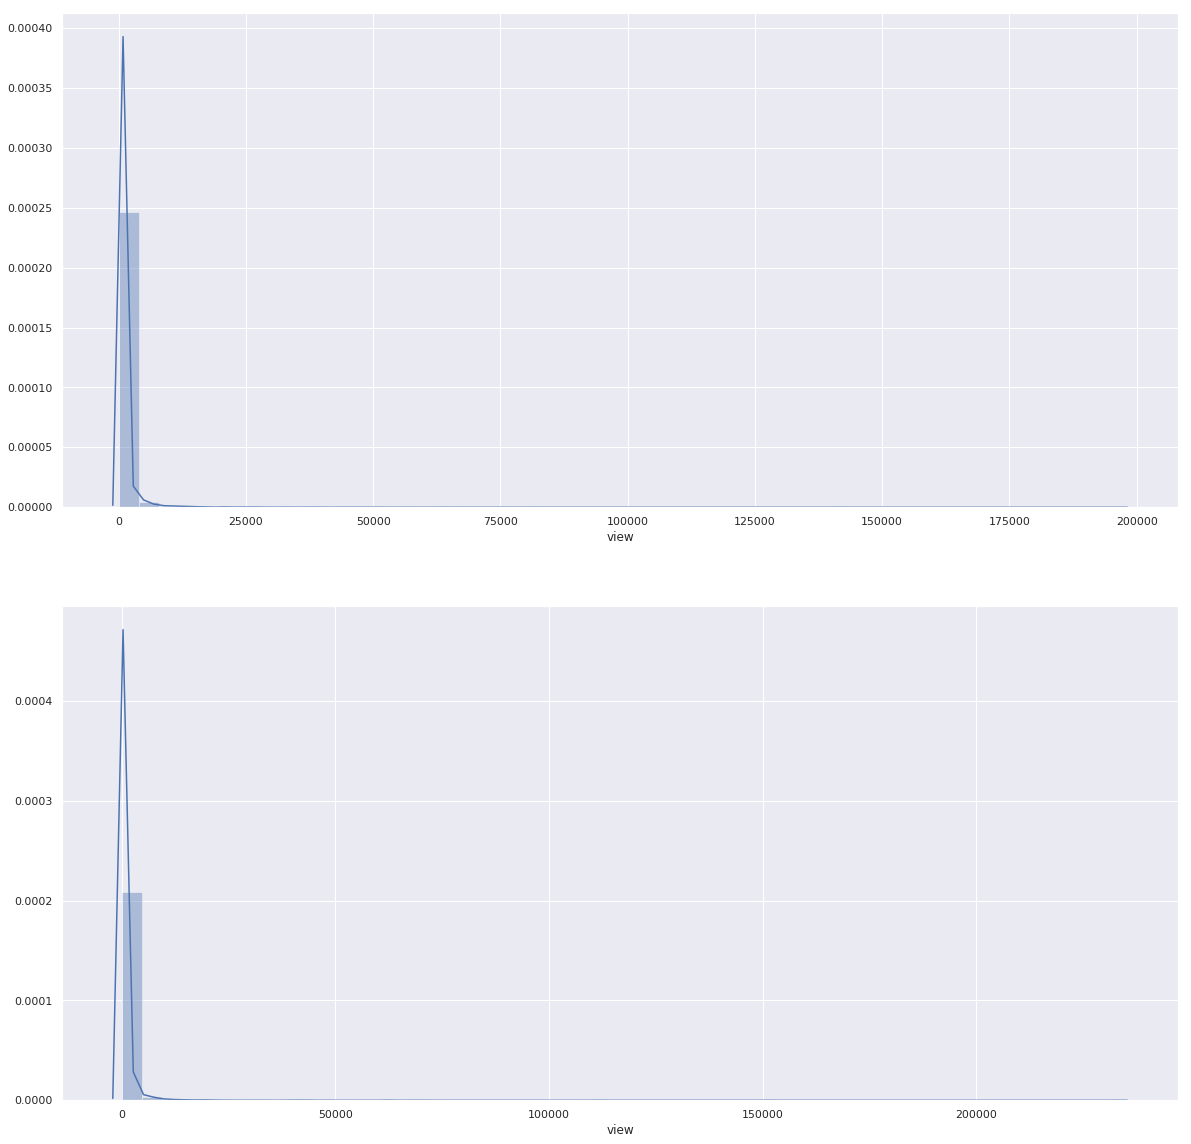

In [30]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_ch3_train['view'],ax=axarr[0])
sns.distplot(input_ch3_test['view'],ax=axarr[1])

In [60]:
view_df = pd.DataFrame(input_ch3_train['view'])

In [61]:
view_df.shape

(36215, 1)

In [62]:
from sklearn.cluster import KMeans

In [63]:
k=2

In [64]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(view_df)
kmeans.cluster_centers_

array([[  695.90854739],
       [47412.        ]])

In [65]:
input_ch3_train['class'] = 0

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
for i in range(8):
    split_class = np.argmax(input_ch3_train['class'].value_counts())
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pd.DataFrame(input_ch3_train[input_ch3_train['class']==split_class]['view']))
    print(kmeans.cluster_centers_)
    print(input_ch3_train['class'].value_counts())
    if len(np.argwhere(kmeans.labels_ == 0)) < len(np.argwhere(kmeans.labels_ == 1)):
        tmp = np.argwhere(kmeans.labels_ == 0)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 1)] = split_class
        kmeans.labels_[tmp] = 7-i
    else:
        tmp = np.argwhere(kmeans.labels_ == 1)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 0)] = split_class
        kmeans.labels_[tmp] = 7-i
    input_ch3_train.loc[(input_ch3_train['class'] == split_class), 'class'] = kmeans.labels_
    

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[  695.90854739]
 [47412.        ]]
0    36215
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[ 516.62842442]
 [9072.81373844]]
0    36128
7    87   
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[ 363.7818371]
 [2374.3198215]]
0    35371
6    757  
7    87   
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[245.61392012]
 [806.05019585]]
0    32683
5    2688 
6    757  
7    87   
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[375.40137478]
 [162.42184222]]
0    25769
4    6914 
5    2688 
6    757  
7    87   
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[211.8058325 ]
 [111.00661736]]
0    15731
3    10038
4    6914 
5    2688 
6    757  
7    87   
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


[[321.50564726]
 [447.82021947]]
3    10038
0    8024 
2    7707 
4    6914 
5    2688 
6    757  
7    87   
Name: class, dtype: int64
[[187.54905532]
 [241.15312586]]
0    8024
2    7707
4    6914
3    5755
1    4283
5    2688
6    757 
7    87  
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [67]:
print(input_ch3_train['class'].value_counts())

0    8024
2    7707
4    6914
3    5755
1    4283
5    2688
6    757 
7    87  
Name: class, dtype: int64


In [68]:
input_ch3_train.groupby('class')['view'].describe()['max']

class
0    268.0   
1    525.0   
2    161.0   
3    384.0   
4    1369.0  
5    4778.0  
6    24006.0 
7    196995.0
Name: max, dtype: float64

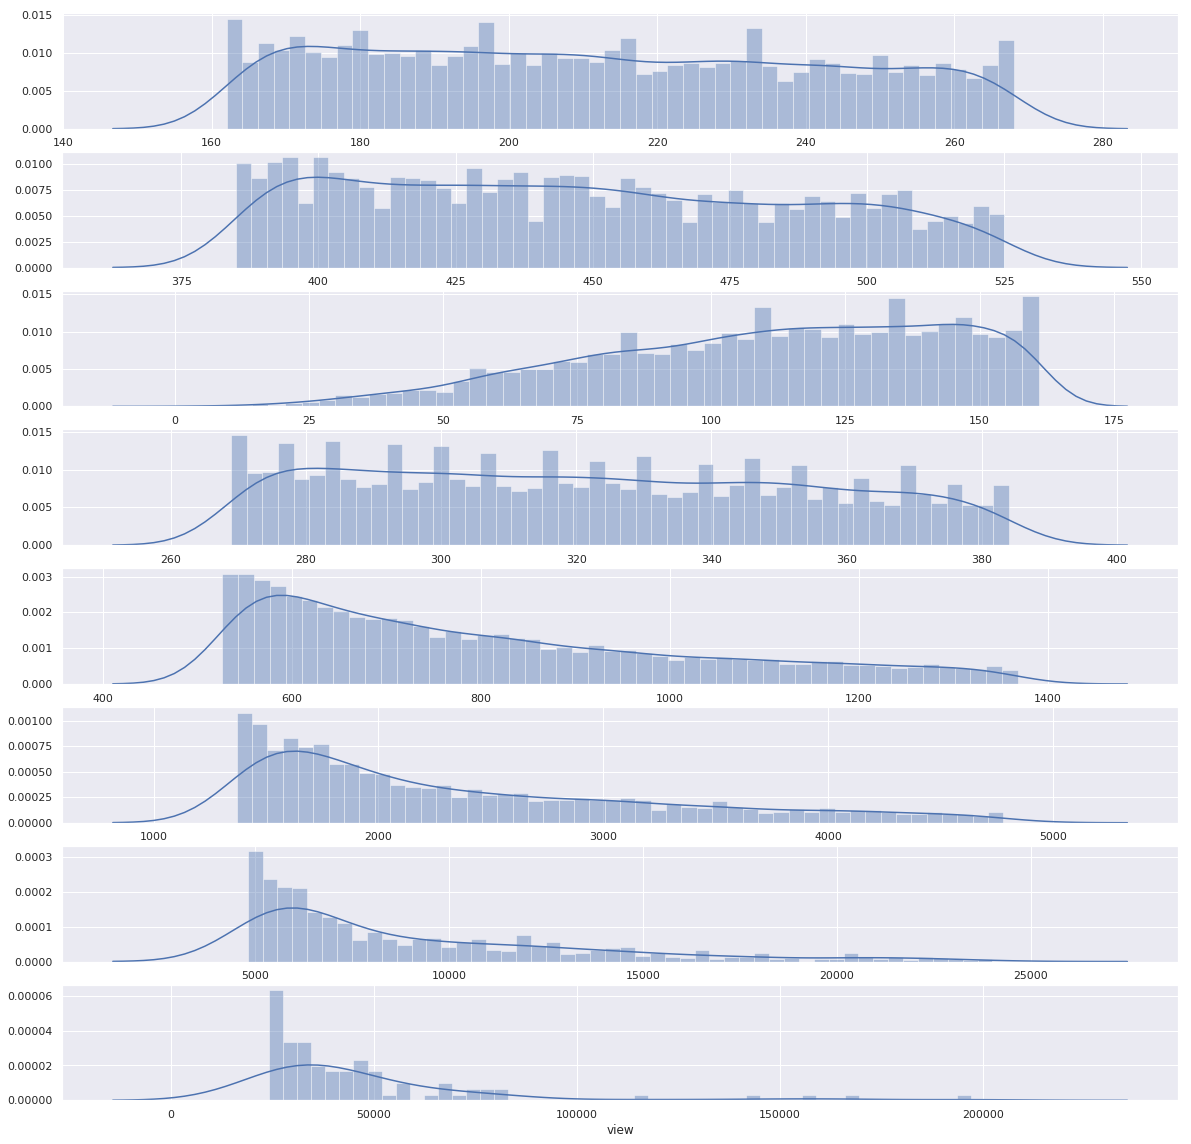

In [69]:
f, axarr = plt.subplots(8, figsize=(20,20))
for i in range(8):
#     print(i,len(input_ch3_train[input_ch3_train['class']==i]))
    if len(input_ch3_train[input_ch3_train['class']==i]) > 1:
        sns.distplot(input_ch3_train[input_ch3_train['class']==i]['view'],ax=axarr[i],bins=50)


## Bag of word feature

In [411]:
inputText_train = []
for sent in input_ch3_train['token']:
    inputText_train.append(sent.split(','))

In [412]:
inputText_test = []
for sent in input_ch3_test['token']:
    inputText_test.append(sent.split(','))

In [413]:
np.log(input_ch3_train['view']).describe()

count    22030.000000
mean     6.529270    
std      1.360707    
min      3.091042    
25%      5.537334    
50%      6.329721    
75%      7.340673    
max      14.004766   
Name: view, dtype: float64

In [414]:
# MINVIEW

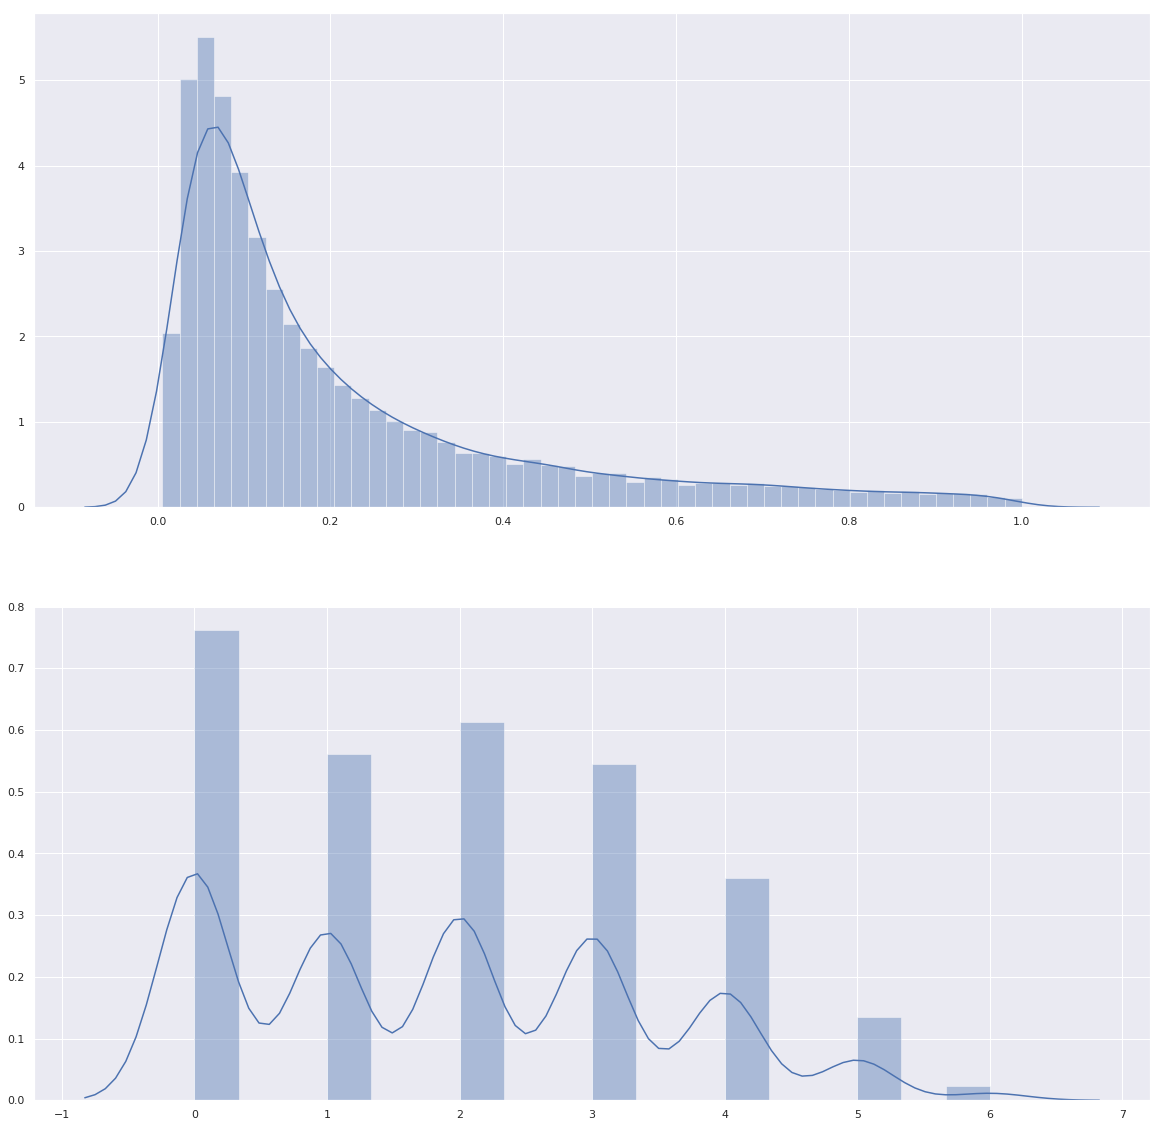

In [415]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train,ax=axarr[0])
sns.distplot(inputLabel_test,ax=axarr[1])

In [416]:
print(len(inputText_train),len(inputLabel_train))

22030 19310


In [417]:
print(len(inputText_test),len(inputLabel_test))

5508 5508


In [418]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//10]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [419]:
len(word_count)

1834

In [420]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [421]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [422]:
len(all_token)

1836

In [423]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [424]:
input_data_train = np.asarray(input_ch3_train['token'].str.split(','))
input_data_test = np.asarray(input_ch3_test['token'].str.split(','))

In [425]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [426]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [427]:
x_f1_train.shape

(22030, 1836)

## Numerical feature

In [428]:
input_ch3.columns

Index(['headline', 'date', 'DOW', 'time', 'view', 'category', 'tag', 'hour',
       'numTag', 'token',
       ...
       'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11'],
      dtype='object', length=101)

In [429]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst','Topic 0','Topic 1','Topic 2', 'Topic 3',
        'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
        'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','num_tag_worst',
#                      'tag_top_worst_sum', 'tag_top_worst_mean','numChar','num_location','sim_worst',
#                     'num_verb','num_noun','nverb_per_ntoken']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','sim_worst','numChar',
#                     'numTag','nnoun_per_ntoken','nverb_per_ntoken','numToken','num_noun','num_verb',
#                      'tag_top_worst_sum','num_neg','tag_top_worst_mean','num_person','num_classifier',
#                     'num_location','num_pos','num_tag_worst','num_organization']

In [430]:
len(numerical_feature)

58

In [431]:
cs = MinMaxScaler()

In [432]:
trainContinuous = cs.fit_transform(input_ch3_train[numerical_feature])
testContinuous = cs.fit_transform(input_ch3_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [433]:
trainContinuous.shape

(22030, 58)

## Categorial feature

In [434]:
categorial_feature = ['DOW', 'hour',
        'month', 'year',
        'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'is_pos',
       'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [435]:
len(categorial_feature)

34

In [436]:
lb = preprocessing.LabelBinarizer()

In [437]:
# zipBinarizer = lb.fit(input_ch3["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_ch3_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_ch3_test["DOW"])
# zipBinarizer = lb.fit(input_ch3["month"])
# trainCategorical_month = zipBinarizer.transform(input_ch3_train["month"])
# testCategorical_month = zipBinarizer.transform(input_ch3_test["month"])
# zipBinarizer = lb.fit(input_ch3["year"])
# trainCategorical_year = zipBinarizer.transform(input_ch3_train["year"])
# testCategorical_year = zipBinarizer.transform(input_ch3_test["year"])
# zipBinarizer = lb.fit(input_ch3["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_ch3_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_ch3_test["hour"])
# zipBinarizer = lb.fit(input_ch3["category"])
# trainCategorical_category = zipBinarizer.transform(input_ch3_train["category"])
# testCategorical_category = zipBinarizer.transform(input_ch3_test["category"])
# zipBinarizer = lb.fit(input_ch3["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_ch3_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_ch3_test["sentiment"])

## Concat feature

In [438]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
    zipBinarizer = lb.fit(input_ch3[f])
    trainCategorical = zipBinarizer.transform(input_ch3_train[f])
    testCategorical = zipBinarizer.transform(input_ch3_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(22030, 1894)


In [439]:
x_train = tmp_train
x_test = tmp_test

In [440]:
x_train.shape

(22030, 1969)

In [441]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [442]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [443]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## Prepare data for Keras

In [444]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [445]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [446]:
x_train.shape

(17624, 1969)

In [447]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (17624, 1969)
val size (4406, 1969)
test size (5508, 1969)


In [448]:
view_bound = list(input_ch3_train.groupby('class')['view'].describe()['max'])

In [449]:
view_bound

[254.0, 466.0, 996.0, 2603.0, 8853.0, 37218.0, 425513.0, 1208350.0]

In [450]:
inputLabel_test = []
for view in input_ch3_test['view']:
    if view <= view_bound[0] :
        inputLabel_test.append(0)
    elif view <= view_bound[1] : 
        inputLabel_test.append(1)
    elif view <= view_bound[2] : 
        inputLabel_test.append(2)
    elif view <= view_bound[3] : 
        inputLabel_test.append(3)
    elif view <= view_bound[4] : 
        inputLabel_test.append(4)
    elif view <= view_bound[5] : 
        inputLabel_test.append(5)
    elif view <= view_bound[6] : 
        inputLabel_test.append(6)
    elif view <= view_bound[7] : 
        inputLabel_test.append(7)
    else: 
        inputLabel_test.append(8)

In [451]:
y_train = input_ch3_train['class']
y_train = np.asarray(y_train).reshape(-1,1)
y_test = inputLabel_test
y_test = np.asarray(y_test).reshape(-1,1)

In [ ]:
y_train = np_utils.to_categorical(inputLabel_train)
y_val = np_utils.to_categorical(inputLabel_val)
y_test = np_utils.to_categorical(inputLabel_test)

In [452]:
# y_train = inputLabel_train
# y_train = np.asarray(y_train).reshape(-1,1)
# y_test = inputLabel_test
# y_test = np.asarray(y_test).reshape(-1,1)

In [453]:
y_train, y_val = train_test_split(y_train, test_size=0.2,random_state=100)

In [454]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [455]:
print("train size",y_train.shape)
print("train size",y_val.shape)
print("test size",y_test.shape)

train size (17624, 1)
train size (4406, 1)
test size (5508, 1)


## Create Model

In [139]:
# def create_model():
# #     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
#     input1 = Input(shape=(x_train.shape[1],))
# #     x = LSTM(32)(input1)
# #     x = Dense(256, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(128, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(64, activation='relu')(x)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(32, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(16, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

# #     x = Dense(2048, activation='relu')(input1)
# #     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.3)(x)
    
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1,activation='linear')(x)
#     model = Model(inputs=input1, outputs=x)
#     adam  = Adam(lr=0.0001)
#     model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
#     return model


In [460]:
def create_model():
    input1 = Input(shape=(x_train.shape[1],))
#     x = Dense(2048, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1024, activation='relu')(input1)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(8,activation='softmax')(x)
    model = Model(inputs=input1, outputs=x)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['acc'])
    
    return model


In [461]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 1969)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 1024)              2017280   
_________________________________________________________________
dropout_45 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_47 (Dropout)         (None, 64)                0         
__________

In [141]:
# weight_path='./model_ver2_1.h5'
# callbacks_list = [
#         ModelCheckpoint(
#             weight_path,
#             save_best_only=True,
#             save_weights_only=True,
#             monitor='val_loss',
#             mode='min',
#             verbose=1
#         )
# ]

In [462]:
weight_path='./model_class_1.h5'
callbacks_list = [
        ModelCheckpoint(
            weight_path,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_acc',
            mode='max',
            verbose=1
        )
]

In [463]:
model.fit(x_train, y_train, 
          batch_size=32 ,epochs=50, verbose=1, validation_data=[x_val,y_val],callbacks=callbacks_list)

ValueError: Error when checking target: expected dense_61 to have shape (8,) but got array with shape (1,)

In [143]:
weight_model='./model_ver2_1.h5'
model = create_model()
model.load_weights(weight_model)
# model._make_predict_function()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 1823)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              1867776   
_________________________________________________________________
dropout_37 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
__________

## Evaluate Model

In [146]:
y_pred = model.predict(x_test)

In [148]:
MAXVIEW

3517

In [149]:
mse = mean_squared_error(y_pred*MAXVIEW, y_test*MAXVIEW)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred*MAXVIEW, y_test*MAXVIEW)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)


mse : 747695.2132521309
rmse : 864.6937106583642
mae : 519.6858078815172


In [123]:
np.exp(y_pred*MAXVIEW_log).shape

(5068, 1)

In [81]:
mse = np.sqrt(mean_squared_error((y_pred*view_sd)+view_mean, (y_test*view_sd)+view_mean))
rmse = np.sqrt(mse)
mae = mean_absolute_error((y_pred*view_sd)+view_mean,(y_test*view_sd)+view_mean)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 212.0802699963063
rmse : 14.562976000677413
mae : 169.42435599370893


In [125]:
MAXVIEW_log

9.310095205113175

In [118]:
mse = mean_squared_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 590854.5741022746
rmse : 768.6706538578629
mae : 472.30802580276884


In [78]:
mse = np.sqrt(mean_squared_error(np.exp((y_pred*diff_log)+MINVIEW_log), np.exp((y_test*diff_log)+MINVIEW_log)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp((y_pred*diff_log)+MINVIEW_log), np.exp((y_test*diff_log)+MINVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 2104.422835193213
rmse : 45.87398865580813
mae : 1409.7671867874697


In [79]:
mse = np.sqrt(mean_squared_error(np.y_pred*MAXVIEW, y_test*MAXVIEW))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred*MAXVIEW, y_test*MAXVIEW)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 1320.231879676309
rmse : 36.334995248056785
mae : 1054.692356838618


In [150]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_train),y_train )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

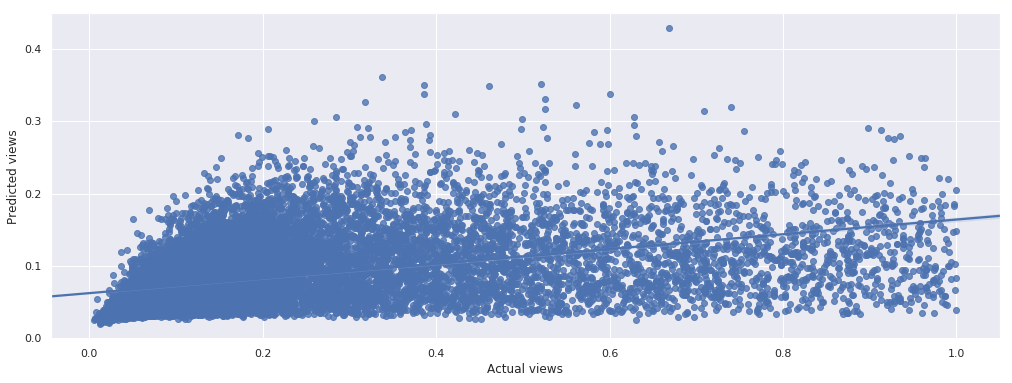

In [151]:
f, ax = plt.subplots(figsize=(17,6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


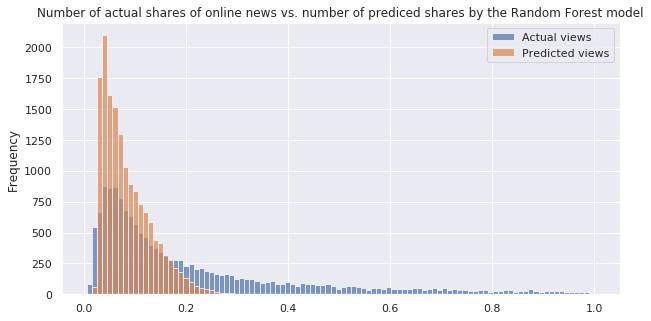

In [152]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [153]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_test),y_test )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [154]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

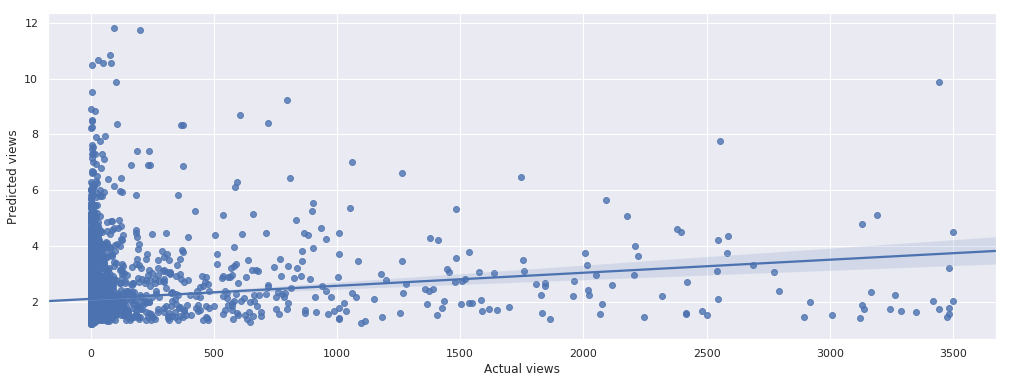

In [155]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

In [156]:
MAXVIEW_log

8.165363632473982

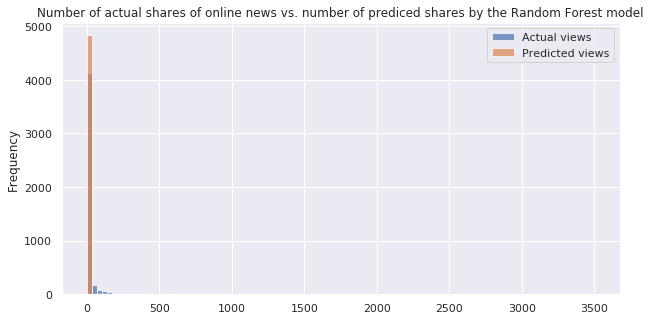

In [157]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [666]:
MAXVIEW

3517

In [671]:
from sklearn.metrics import r2_score

r2_score( np.exp(y_test*MAXVIEW_log), np.exp(y_pred*MAXVIEW_log))

0.005220260378779984

In [281]:
for i in range(0,50):
#     print(y_test[i],y_pred[i])
    print(np.exp((y_test[i]*diff_log)+MINVIEW_log),np.exp((y_pred[i]*diff_log)+MINVIEW_log))

[32.58852662] [26.683107]
[61.69388728] [57.003967]
[22.6266326] [44.10033]
[67.97336833] [38.13454]
[27.53149448] [23.504541]
[20.56067932] [25.230734]
[20.56067932] [22.433186]
[33.34286953] [35.944588]
[21.92362254] [18.41748]
[17.36280014] [21.495384]
[19.85150634] [19.551714]
[81.14226595] [27.539337]
[77.75824307] [34.574886]
[50.49108737] [35.238964]
[41.35378164] [23.992352]
[24.72496323] [26.475117]
[22.53390979] [32.154125]
[51.460011] [26.53703]
[32.86442964] [26.476954]
[18.31390873] [21.711073]
[28.77581633] [28.00306]
[19.74854374] [26.740978]
[61.23482991] [44.989964]
[56.9942846] [26.51107]
[26.52726938] [27.987988]
[74.80720388] [61.131138]
[24.5519761] [28.628952]
[26.44562193] [31.246397]
[49.85326105] [45.161514]
[41.29651201] [54.307602]
[54.39851023] [34.57528]
[32.4498746] [26.446053]
[23.80565499] [23.12685]
[21.15336747] [23.963053]
[46.8983155] [36.9036]
[25.82673002] [23.005583]
[44.70876455] [28.096043]
[42.73769324] [46.057648]
[41.26785343] [20.729435]
[32

In [282]:
for i in range(0,50):
#     print(y_test[i],y_pred[i])
    print(np.exp(y_pred[i]*MAXVIEW_log),np.exp(y_test[i]*MAXVIEW_log))

[365.83087] [524.00001]
[1431.4364] [1650.00001]
[902.49866] [272.00001]
[695.02295] [1964.00001]
[291.2597] [387.00001]
[330.8231] [229.00001]
[267.83475] [229.00001]
[624.9384] [546.00001]
[187.89471] [257.00001]
[248.04813] [169.00001]
[209.19972] [215.00001]
[387.198] [2700.00001]
[582.79114] [2501.00001]
[603.06256] [1151.00001]
[302.2133] [804.00001]
[360.72174] [319.00001]
[511.51318] [270.00001]
[362.23926] [1191.00001]
[360.76678] [532.00001]
[252.53923] [186.00001]
[398.9942] [419.00001]
[367.25797] [213.00001]
[935.4817] [1628.00001]
[361.6026] [1431.00001]
[398.60837] [362.00001]
[1623.0474] [2333.00001]
[415.1642] [315.00001]
[485.85315] [360.00001]
[941.9025] [1125.00001]
[1312.0494] [802.00001]
[582.8031] [1316.00001]
[360.0105] [520.00001]
[282.90228] [298.00001]
[301.5504] [241.00001]
[655.2225] [1008.00001]
[280.24173] [345.00001]
[401.37836] [925.00001]
[975.75836] [853.00001]
[232.38893] [801.00001]
[920.6873] [511.00001]
[577.30035] [1695.00001]
[224.96858] [164.00

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ImportError: Traceback (most recent call last):
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/burin/py_36_env/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/burin/py_36_env/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.